<a href="https://colab.research.google.com/github/RudraKhare/RudraKhare-Sales_Advertising_Machine_Learning-/blob/main/sales_adv_ridge_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("swedish_insurance.csv")

In [ ]:
df.head(5)

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [ ]:
df.columns =["SALES","ADVERTISING"]

In [ ]:
df.mean()

SALES          22.904762
ADVERTISING    98.187302
dtype: float64

In [ ]:
df.head()

,SALES,ADVERTISING
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [ ]:
df.describe()

,SALES,ADVERTISING
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


In [ ]:
X=df['SALES'].values
y=df['ADVERTISING'].values

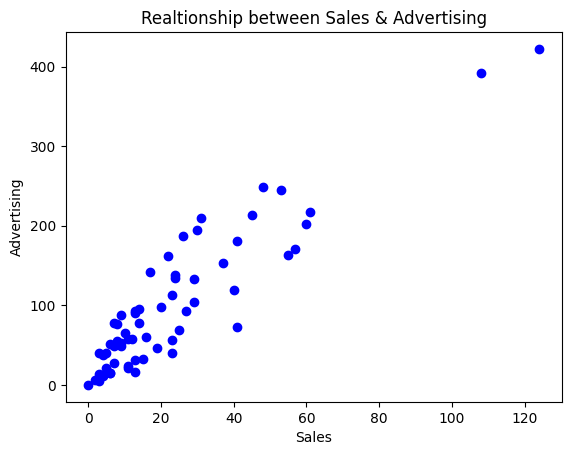

In [ ]:
plt.scatter(X,y,color='blue')
plt.title("Realtionship between Sales & Advertising")
plt.xlabel("Sales")
plt.ylabel("Advertising")
plt.show()


In [ ]:
X.shape

(63,)

In [ ]:
y.shape

(63,)

In [ ]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)

In [ ]:
X.shape

(63, 1)

In [ ]:
y.shape

(63, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=5)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(y_test.shape)

(42, 1)
(42, 1)
(21, 1)
(21, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(X_train,Y_train) # Train the linear regression model using the training data. The model will learn the coefficients (w) and intercept (b) that best fit the training data.

y_pred= lm.predict(x_test) #Use the trained model to make predictions on the test set (x_test). The predicted values are stored in the y_pred variable.



In [ ]:
y_pred

array([[ 40.79702171],
       [ 47.98258651],
       [162.95162332],
       [ 55.16815131],
       [ 33.61145691],
       [ 58.76093371],
       [119.83823452],
       [ 33.61145691],
       [148.58049372],
       [ 94.68875771],
       [461.15256253],
       [ 40.79702171],
       [231.21448892],
       [162.95162332],
       [ 65.94649851],
       [127.02379932],
       [ 62.35371611],
       [ 37.20423931],
       [ 26.42589211],
       [ 98.28154011],
       [119.83823452]])

In [ ]:
y_pred.shape

(21, 1)

Text(0.5, 1.0, 'Relationship between Sales & Advertising')

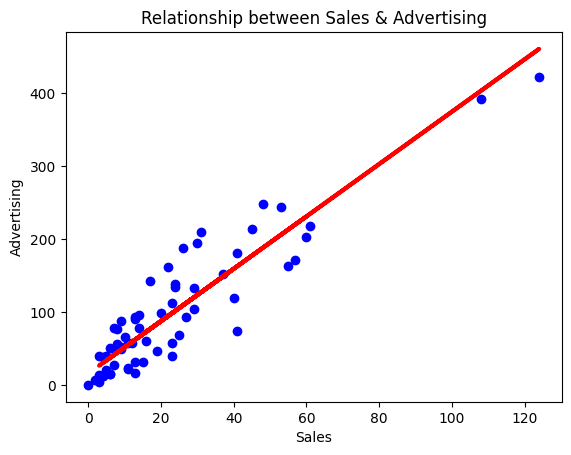

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(x_test,y_pred,color="Red",linewidth=3,label="LM LINE")
plt.xlabel("Sales")
plt.ylabel("Advertising")
plt.title("Relationship between Sales & Advertising")

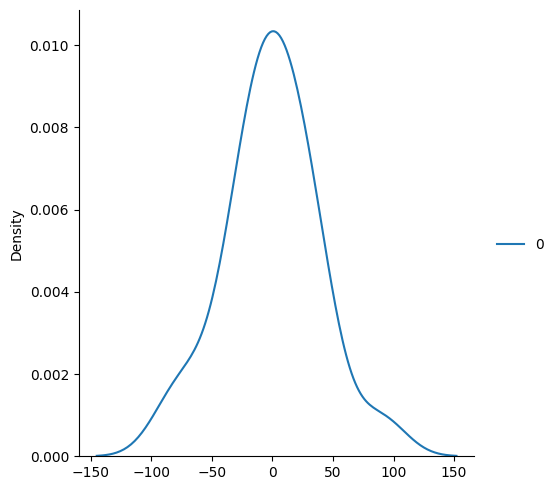

In [ ]:
import seaborn as sns
sns.displot(y_pred-y_test, kind='kde')

In [ ]:
#Ridge_Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge_regressor=Ridge()

In [ ]:
ridge_regressor

Ridge()

In [ ]:
parameter={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameter,scoring='neg_mean_squared_error', cv=5)
ridgecv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridgecv.best_params_)

{'alpha': 90}


In [ ]:
print(ridgecv.best_score_)

-1234.8322277621298


In [ ]:
ridge_pred=ridgecv.predict(x_test)

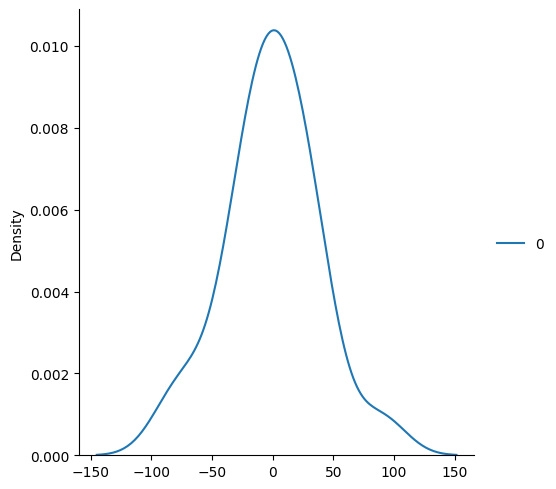

In [ ]:
import seaborn as sns
sns.displot(ridge_pred-y_test, kind='kde')

In [ ]:
## Lasso Regression
from sklearn.linear_model import Lasso

In [ ]:
lasso=Lasso()

In [ ]:
parameter={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameter,scoring='neg_mean_squared_error', cv=5)
lassocv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 30}
-1233.8781528642317


In [ ]:
lasso_pred=lassocv.predict(x_test)

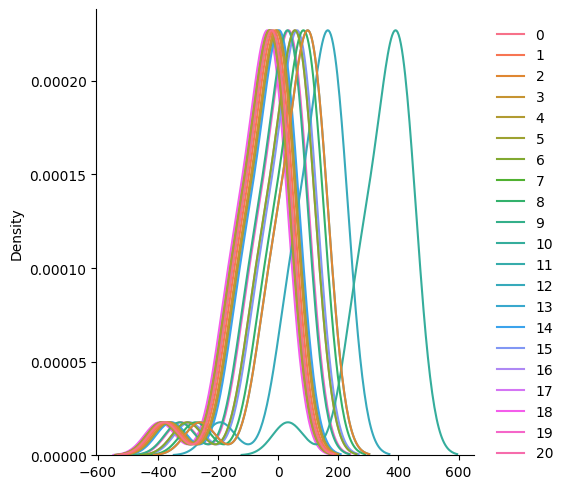

In [ ]:
import seaborn as sns
sns.displot(lasso_pred-y_test, kind='kde')